## AWGN channel with BPSK

In [1]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

In [2]:
transmission_count = 100000
SNR = 5
sigma = np.sqrt(1 / SNR)


def transmission(s):
    x = rnd.randrange(-1,2,2)
    n = rnd.gauss(0,s)
    y = x + n
    return x,y
    
i = 0
Errors = 0
results = []
while i < transmission_count:
    x,y = transmission(sigma)
    results.append(y)
    if x == 0:
        if y >= 0:
            Errors += 1
    elif x == 1:
        if y <= 0:
            Errors += 1
    i += 1

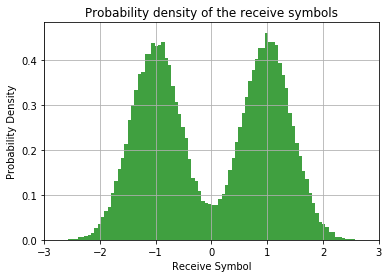

BER = 0.00648


In [3]:
plt.hist(results, 100, (-3,3), density=True, facecolor='g', alpha=0.75)

plt.xlabel('Receive Symbol')
plt.ylabel('Probability Density')
plt.title('Probability density of the receive symbols')
plt.xlim(-3, 3)
#plt.ylim(0, 0.03)
plt.grid(True)
plt.show()

BER = Errors / transmission_count
print('BER =',BER)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


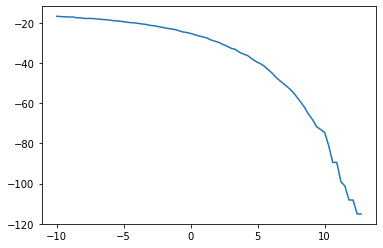

In [4]:
BER_results = []
SNR_dB_list = np.linspace(-10,20,100)
for SNR_dB in SNR_dB_list:
    
    SNR = 10**(SNR_dB/10)
#    print(SNR)
    sigma = 1 / np.sqrt(SNR)
#    print(sigma)
    
    i = 0
    Errors = 0
    while i < transmission_count:
        x,y = transmission(sigma)
        if x == 0:
            if y >= 0:
                Errors += 1
        elif x == 1:
            if y <= 0:
                Errors += 1
        i += 1
        
    BER = Errors/transmission_count
    BER_results.append(BER)
    
#print(BER_results)
plt.plot(SNR_dB_list,10*np.log(BER_results))
 